# Table of Contents
* [Intro](#Intro)
* [Word Stats by Sender](#Word-Stats-by-Sender)
	* [Top Words](#Top-Words)
		* [Top Words Total](#Top-Words-Total)
		* [Top Words by Sender](#Top-Words-by-Sender)
		* [Top Unbalanced Words](#Top-Unbalanced-Words)
	* [Words Used Just By](#Words-Used-Just-By)
* [Word Stats by Month](#Word-Stats-by-Month)
	* [Total](#Total)
	* [By Sender](#By-Sender)
* [Word Stats by Hour](#Word-Stats-by-Hour)


# Intro

This notebook explores different avaiable words-usage related stats together with their visualization.

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import sys
sys.path.append(os.path.join(os.getcwd(), "src"))

import util.io as mio
import util.plotting as mplot
from model.conversationDataframe import ConversationDataframe
from stats.wordsCountStats import WordsCountStats
from stats.iConvStats import IConvStats

%matplotlib notebook
sns.set_context("paper")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# filepath to your conversation file. You can use my conversations examples for testing
FILEPATH = "src/resources/unittest/test_plotting.txt"

In [3]:
# load conversation
conv = ConversationDataframe(FILEPATH)
conv.loadMessages()
msgs = conv.messages
msgs.head()

,year,month,day,date,hour,time,datetime,sender,text
0,2014,01,30,2014.01.30,17,17:58:04,2014-01-30 17:58:04,s2,afar prairie overhead under last all master Ha...
1,2014,01,30,2014.01.30,20,20:33:16,2014-01-30 20:33:16,s1,"the them any of of , yellower the"
2,2014,01,30,2014.01.30,21,21:48:49,2014-01-30 21:48:49,s2,", soothing laugher the , had , ' long not of"
3,2014,01,31,2014.01.31,03,03:34:11,2014-01-31 03:34:11,s2,"first thy , cotton , here - , always a , really"
4,2014,01,31,2014.01.31,16,16:39:02,2014-01-31 16:39:02,s1,"young , whole the balls forth south I also"


# Word Stats by Sender

In [23]:
# load sender stats
sender_stats = conv.stats.generateStats(IConvStats.STATS_NAME_WORDCOUNT)
sender_word_count = sender_stats.wordsCount
sender_word_count.head()

,--,--',1,11,17,1865,1876,19,2,25,...,youngest,your,yours,yourself,yourselves,youth,youths,zeus,zones,zuyder
sender,,,,,,,,,,,,,,,,,,,,,
s1,54,1,3,0,1,1,0,1,6,0,...,1,24,2,5,2,4,1,0,1,0
s2,54,0,1,2,0,0,1,0,3,1,...,0,24,1,3,0,1,0,1,0,1


## Top Words

### Top Words Total

In [47]:
total_word_count = sender_word_count.loc['s1']+sender_word_count.loc['s2']
total_word_count.sort_values(ascending=False)

the             1413
and              693
of               589
i                397
to               307
in               275
d                238
you              219
with             193
a                169
all              154
my               150
for              141
is               136
or               136
that             127
me               124
not              115
as               113
--               108
it               103
from             101
on                93
s                 85
o                 78
are               77
be                73
at                73
what              63
them              61
                ... 
mystery            1
mysteries          1
muttering          1
mutilated          1
muskets            1
musketry           1
nests              1
nevertheless       1
observers          1
newer              1
observer           1
obligated          1
obi                1
obeys              1
obeying            1
obelisks           1
oats         

### Top Words by Sender

In [46]:
sender_word_count.loc['s1'].sort_values(ascending=False)

the            707
and            358
of             311
i              224
to             150
in             135
d              128
you            119
with           103
all             79
my              79
a               78
or              76
for             72
that            69
as              67
is              66
not             62
me              60
it              55
--              54
from            46
on              45
be              42
o               40
are             39
s               39
what            37
at              37
them            31
              ... 
rocks            0
foe              0
rotting          0
flames           0
sagacious        0
flame            0
safely           0
film             0
final            0
finale           0
finally          0
sacrificers      0
finger           0
runs             0
fireman          0
fires            0
rum              0
firmly           0
fisher           0
fisherman        0
ruin             0
fishers     

### Top Unbalanced Words

In [49]:
unbalances_word_count = (sender_word_count.loc['s1']-sender_word_count.loc['s2']).abs()
unbalances_word_count.sort_values(ascending=False)

i             51
of            33
and           23
as            21
you           19
d             18
or            16
with          13
a             13
where         12
what          11
be            11
see           11
that          11
rest          10
not            9
back           9
from           9
words          9
well           9
perfect        8
her            8
through        8
hear           8
an             8
has            8
touch          8
my             8
here           8
women          7
              ..
containing     0
consider       0
conquerors     0
slumbering     0
smoke          0
softly         0
council        0
counteract     0
daylight       0
cover          0
daughter       0
darts          0
service        0
darkening      0
dare           0
sex            0
shake          0
shall          0
cutters        0
shed           0
cuba           0
cruise         0
shops          0
should         0
shoulders      0
crowd          0
cries          0
side          

## Words Used Just By

In [22]:
s_o = "s1" #sender origin
s_r = "s2" #sender reference
#transpose to have sender count as columns, and words as rows
word_count = sender_word_count.transpose().reset_index()

In [42]:
# collect words
words = word_count[(word_count[s_r]==0)&(word_count[s_o]!=0)].sort_values(s_o, ascending=False)

In [43]:
words

sender,index,s1,s2
2329,nations,7,0
270,banner,7,0
1300,fire,6,0
1459,gather,6,0
1320,five,5,0
2374,north,5,0
2457,ourselves,4,0
3675,turns,4,0
3910,whisper,4,0
182,armies,4,0


# Word Stats by Month

In [25]:
# load month stats
month_stats = conv.stats.generateStats(IConvStats.STATS_NAME_WORDCOUNT, groupByColumns=['year', 'month'])
month_word_count = month_stats.wordsCount
month_word_count.head()
#filepath = conv.statsFolder + '\\' + 'wordCount.txt'
#mio.printDataFrameToFile(stats, filepath)

--  --'  1  11  17  1865  1876  19  2  25   ...    \
year month sender                                              ...     
2014 01    s1       0    0  0   0   0     0     0   0  0   0   ...     
           s2       0    0  0   0   0     0     0   0  0   0   ...     
     02    s1       2    0  0   0   1     0     0   0  1   0   ...     
           s2       3    0  0   0   0     0     0   0  0   1   ...     
     03    s1       1    0  0   0   0     0     0   0  0   0   ...     

                   youngest  your  yours  yourself  yourselves  youth  youths  \
year month sender                                                               
2014 01    s1             0     0      0         0           0      0       0   
           s2             0     0      0         0           0      0       0   
     02    s1             0     0      0         0           0      0       0   
           s2             0     1      0         0           0      1       0   
     03    s1             0     0      0         0           0      1       0   

                   zeus  zones  zuyder  
year month sender                       
2014 01    s1         0      0       0  
           s2         0      0       0  
     02    s1         0      0       0  
           s2         0      0       0  
     03    s1         0      0       0  

[5 rows x 4029 columns]

## Total

In [29]:
tot_month_word_count = month_stats.getWordsCount(['17','your','youth'])
tot_month_word_count.head()

17  your  youth
year month                 
2014 01      0     0      0
     02      1     1      1
     03      0     0      1
     04      0     1      0
     05      0     2      0

<IPython.core.display.Javascript object>


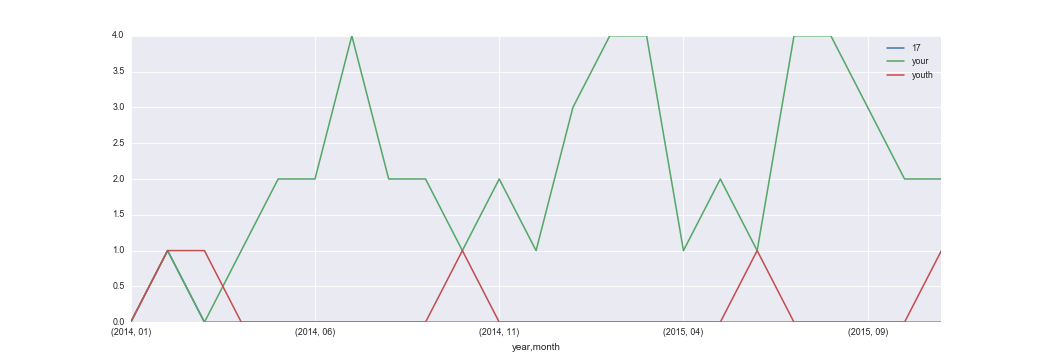

In [30]:
# plot total for target words
tot_month_word_count.plot()
sns.plt.show()

## By Sender

In [9]:
# get data to plot (target words)
target_words = ['17','your','youth']
stats_to_plot = mplot.transformStats(month_word_count[target_words], 'words', 'val')

<IPython.core.display.Javascript object>


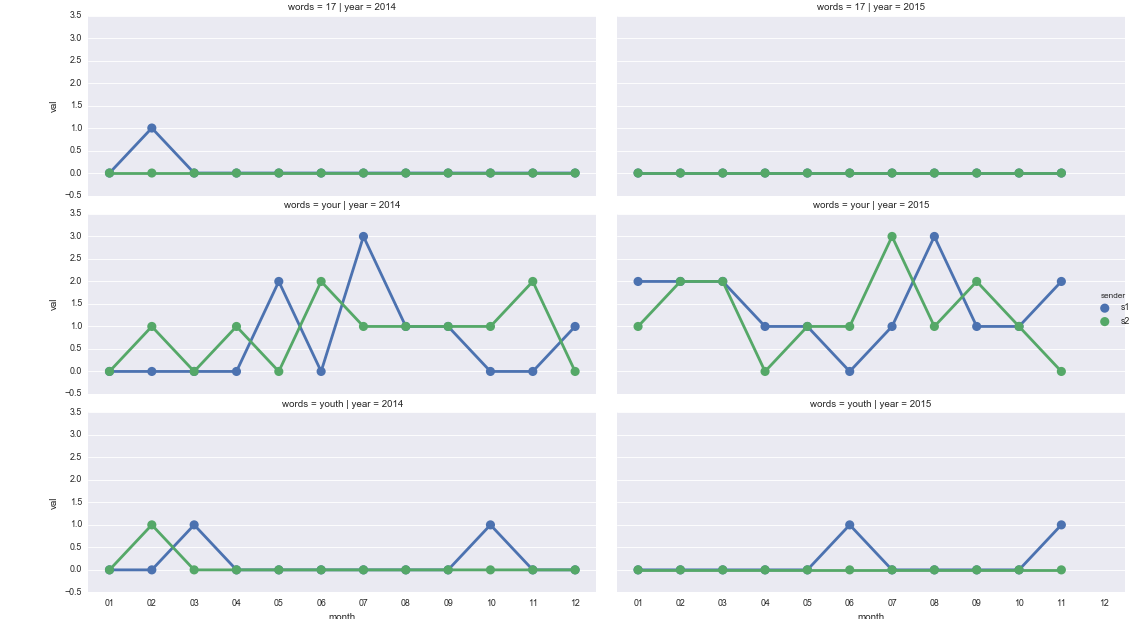

In [12]:
# plot each word in different row, hues differentiate sender, columns split years
sns.factorplot(x="month", y="val", row="words", hue='sender', col='year',
                   data=stats_to_plot, kind="point", sharey=True)
sns.plt.show()

<IPython.core.display.Javascript object>


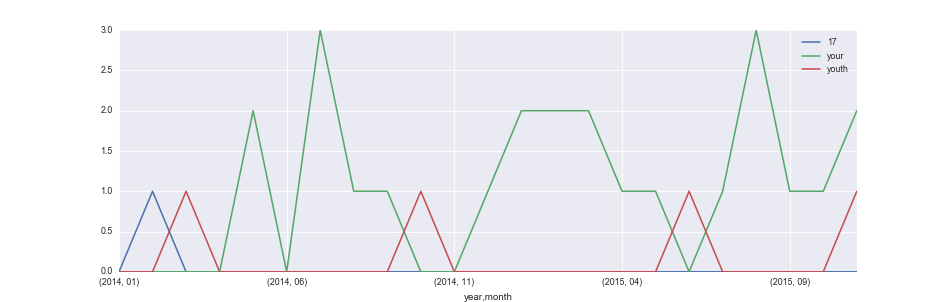

In [62]:
# plot for target sender and words single graph
month_word_count.xs('s1', level='sender')[['17','your','youth']].plot()
sns.plt.show()

# Word Stats by Hour

In [26]:
# load hours stats
hour_stats = conv.stats.generateStats(IConvStats.STATS_NAME_WORDCOUNT, groupByColumns=['hour'])
hour_word_count = hour_stats.wordsCount
hour_word_count.head()

--  --'  1  11  17  1865  1876  19  2  25   ...    youngest  \
hour sender                                              ...               
00   s1       1    0  0   0   0     0     0   0  2   0   ...           0   
     s2       1    0  0   0   0     0     0   0  0   0   ...           0   
01   s1       2    0  0   0   0     0     0   0  0   0   ...           0   
     s2       7    0  0   0   0     0     0   0  0   0   ...           0   
02   s1       1    0  0   0   0     0     0   0  0   0   ...           0   

             your  yours  yourself  yourselves  youth  youths  zeus  zones  \
hour sender                                                                  
00   s1         1      0         0           0      0       0     0      0   
     s2         0      0         1           0      0       0     0      0   
01   s1         2      1         0           0      0       0     0      0   
     s2         2      0         0           0      0       0     0      0   
02   s1         0      0         0           0      0       0     0      0   

             zuyder  
hour sender          
00   s1           0  
     s2           0  
01   s1           0  
     s2           0  
02   s1           0  

[5 rows x 4029 columns]

## Total

In [31]:
tot_hour_word_count = hour_stats.getWordsCount(['17','your','youth'])
tot_hour_word_count.head()

,17,your,youth
hour,,,
00,0,1,0
01,0,4,0
02,0,1,0
03,0,3,1
04,0,4,1


<IPython.core.display.Javascript object>


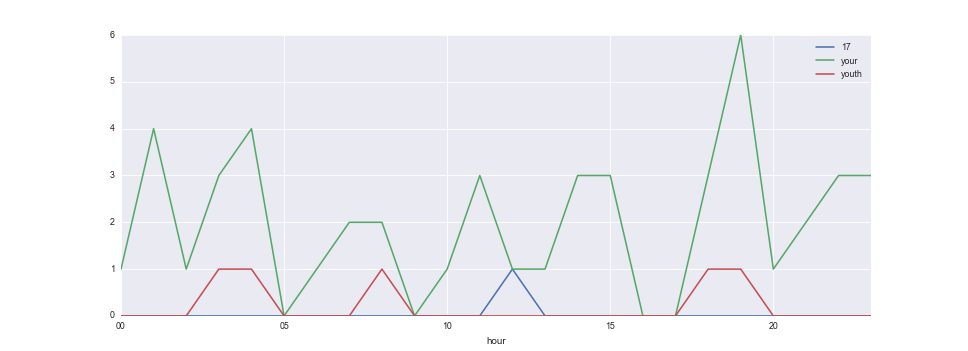

In [32]:
# plot total for target words
tot_hour_word_count.plot()
sns.plt.show()

## By Sender

In [14]:
# get data to plot (target words)
target_words = ['17','your','youth']
stats_to_plot = mplot.transformStats(hour_word_count[target_words], 'words', 'val')

<IPython.core.display.Javascript object>


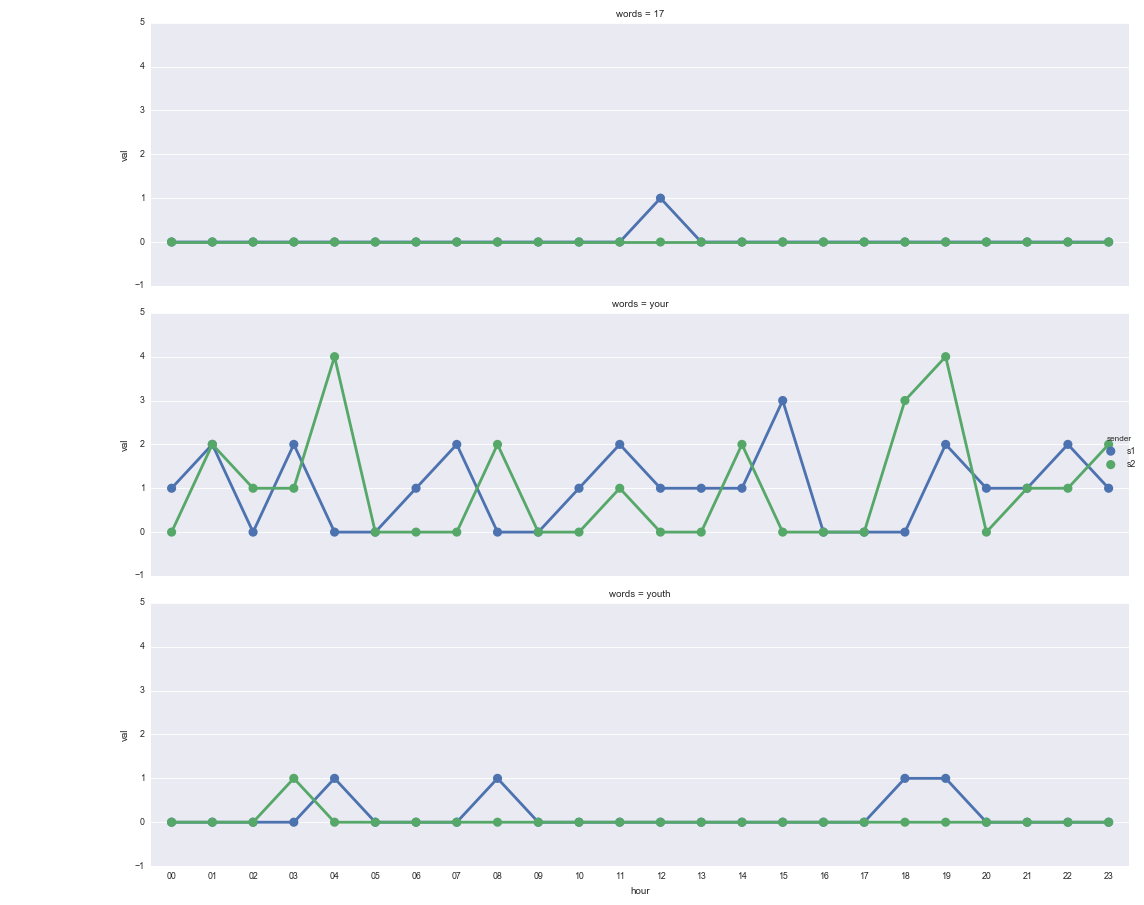

In [16]:
# plot each word in different row, hues differentiate sender
sns.factorplot(x="hour", y="val", row="words", hue='sender',
                   data=stats_to_plot, kind="point", sharey=True)
sns.plt.show()

<IPython.core.display.Javascript object>


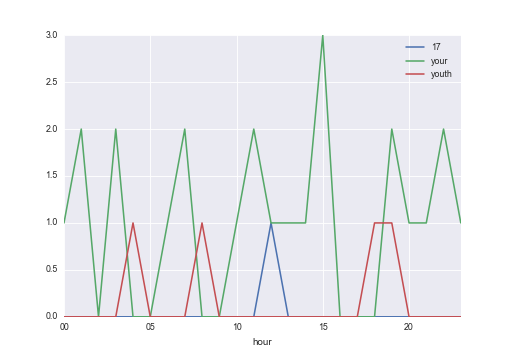

In [17]:
# plot for target sender and words single graph
hour_word_count.xs('s1', level='sender')[['17','your','youth']].plot()
sns.plt.show()